In [ ]:
#Section 1
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''
df = pd.read_csv(StringIO(csv_data))
print(df)
print(df.isnull().sum())

#Task 2
# Modify DataFrame to add more missing values
df.loc[0, 'B'] = None   
df.loc[2, 'A'] = None   
df.loc[1, 'D'] = None      
  
 
print(df)
print(df.isnull().sum())  

      A     B     C    D
0   1.0   2.0   3.0  4.0
1   5.0   6.0   NaN  8.0
2  10.0  11.0  12.0  NaN
A    0
B    0
C    1
D    1
dtype: int64
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  NaN
2  NaN  11.0  12.0  NaN
A    1
B    1
C    1
D    2
dtype: int64


task1
Run the code. How many missing values are in each column? 
    - there is only one missin gvalue both in column c and column d, in total the are only 2 missing values.


Modify the DataFrame to add more missing values and recheck.
    - After i modified the data set using df.loc (df.loc[0, 'B'] = None , df.loc[2, 'A'] = None df.loc[1, 'D'] = None )there where 5 missing values in the dataset
    

In [21]:
#Excersize 1.2
# Drop rows with any missing values
print(df.dropna(axis= 0))
# Drop columns with any missing values
print(df.dropna(axis=1))

# Drop rows where all values are missing (none in this case)
print(df.dropna(how='all'))
# Drop rows with fewer than 4 non-missing values
print(df.dropna(thresh=4))
# Drop rows where 'C' is missing
print(df.dropna(subset=['D']))

Empty DataFrame
Columns: [A, B, C, D]
Index: []
Empty DataFrame
Columns: []
Index: [0, 1, 2]
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  NaN
2  NaN  11.0  12.0  NaN
Empty DataFrame
Columns: [A, B, C, D]
Index: []
     A   B    C    D
0  1.0 NaN  3.0  4.0


Task

Experiment with different parameters. When would dropping rows vs. columns be preferable?

    - we drop a column when it has many missing values
    - we drop a raw when it has a few missing values
    

In [24]:
#Excersize 1.3

from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(df)
print(imputed_data)


imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(df)
print(imputed_data)

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
print(df)
print(imputed_data)





     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  NaN
2  NaN  11.0  12.0  NaN
[[ 1.   8.5  3.   4. ]
 [ 5.   6.   7.5  4. ]
 [ 3.  11.  12.   4. ]]
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  NaN
2  NaN  11.0  12.0  NaN
[[ 1.   8.5  3.   4. ]
 [ 5.   6.   7.5  4. ]
 [ 3.  11.  12.   4. ]]
     A     B     C    D
0  1.0   NaN   3.0  4.0
1  5.0   6.0   NaN  NaN
2  NaN  11.0  12.0  NaN
[[ 1.  6.  3.  4.]
 [ 5.  6.  3.  4.]
 [ 1. 11. 12.  4.]]


Task 1
Change strategy to 'median' or 'most_frequent'. Compare results.
    -with mean it takes the average of the column
    -whith median it takes the middle number of the column
    -whith most appearing it takes the constantly appearing number.

    
Task 2
Why might 'most_frequent' be useful for categorical data?
    - it preserves the category meaning, since categorical data uses discrete labels.
    - The most frequent is usually reasonable for guessing missing values for categorical data

In [ ]:
#Section 2
#Excersize 2 (Handling categorical data)
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2'],
    #Task
    ['blue', 'S', 4.9, 'class1']])
df.columns = ['color', 'size', 'price', 'classlabel']

size_mapping = {'XL': 3, 'L': 2, 'M': 1}
#Task
size_mapping['S'] = 0
print(size_mapping)
df['size'] = df['size'].map(size_mapping)
print(df)

# Inverse mapping
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print(df['size'].map(inv_size_mapping)) 

{'XL': 3, 'L': 2, 'M': 1, 'S': 0}
   color  size  price classlabel
0  green     1   10.1     class2
1    red     2   13.5     class1
2   blue     3   15.3     class2
3   blue     0    4.9     class1
0     M
1     L
2    XL
3     S
Name: size, dtype: object


In [33]:
#Excersiz 2.2(Encoding class labels)
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
print(y)

# Inverse
print(class_le.inverse_transform(y))


[1 0 1 0]
['class2' 'class1' 'class2' 'class1']


Task
Why encode labels as integers? Test with a classifier if not encoded.
    - Many machine learning algorithms cannot work with string labels directly.

In [35]:
#Excersize 2.3(one-Hot encoding for nominal features)

X = df[['color', 'size', 'price']].values
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
print(X)

# One-hot encoding
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
print("\n", ohe.fit_transform(X[:, [0]]).toarray())  # Only on 'color'

# Using pandas get_dummies
print("\n", pd.get_dummies(df[['price', 'color', 'size']]))

# Drop first column to avoid multicollinearity
print(pd.get_dummies(df[['price', 'color', 'size']], drop_first=True))

[[1 1 10.1]
 [2 2 13.5]
 [0 3 15.3]
 [0 0 4.9]]

 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]]

    price  size  color_blue  color_green  color_red
0   10.1     1       False         True      False
1   13.5     2       False        False       True
2   15.3     3        True        False      False
3    4.9     0        True        False      False
   price  size  color_green  color_red
0   10.1     1         True      False
1   13.5     2        False       True
2   15.3     3        False      False
3    4.9     0        False      False


In [42]:
import pandas as pd

# Example DataFrame


# Separate features and target
X = df[['color', 'size', 'price']]
y = df['classlabel']

# One-hot encode categorical features using pandas get_dummies
X_encoded = pd.get_dummies(X, drop_first=True)  # drop_first avoids multicollinearity
print("One-hot encoded features:\n", X_encoded)

# Optional: encode target labels if needed
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y_encoded = class_le.fit_transform(y)
print("\nEncoded target labels:", y_encoded)
print("Inverse transform:", class_le.inverse_transform(y_encoded))


One-hot encoded features:
    size  price  color_green  color_red
0     1   10.1         True      False
1     2   13.5        False       True
2     3   15.3        False      False
3     0    4.9        False      False

Encoded target labels: [1 0 1 0]
Inverse transform: ['class2' 'class1' 'class2' 'class1']


Apply one-hot encoding to the full DataFrame. Discuss multicollinearity and why dropping one column helps.

Multicollinearity is a situation in regression or machine learning models where two or more predictor (feature) variables are highly correlated

why?.
This causes perfect correlation between features → ML models (like linear regression) cannot estimate coefficients properly.

Dropping one column avoids this because the dropped column is implicitly represented by the remaining columns.

In [ ]:
#Section 3
#Excersize 3


df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
                   'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
print(df_wine.head())

from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)




   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92  

In [ ]:
#3.1
#Task
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)
import numpy as np

# Count of each class in train and test
unique, counts = np.unique(y_train, return_counts=True)
print("y_train class distribution:", dict(zip(unique, counts)))

unique, counts = np.unique(y_test, return_counts=True)
print("y_test class distribution:", dict(zip(unique, counts)))


y_train class distribution: {np.int64(1): np.int64(41), np.int64(2): np.int64(50), np.int64(3): np.int64(33)}
y_test class distribution: {np.int64(1): np.int64(18), np.int64(2): np.int64(21), np.int64(3): np.int64(15)}


Why use stratify?

Stratified sampling ensures the same class proportions in train and test sets as in the original data.

In [48]:
#Section 4
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm[:2])  # First two rows

[[0.64619883 0.83201581 0.4248366  0.46236559 0.27160494 0.35172414
  0.09704641 0.68       0.18987342 0.23623446 0.45744681 0.28571429
  0.19400856]
 [0.6871345  0.15612648 0.65359477 0.43548387 0.7654321  0.67931034
  0.50632911 0.74       0.2943038  0.3250444  0.81914894 0.63369963
  0.68259629]]


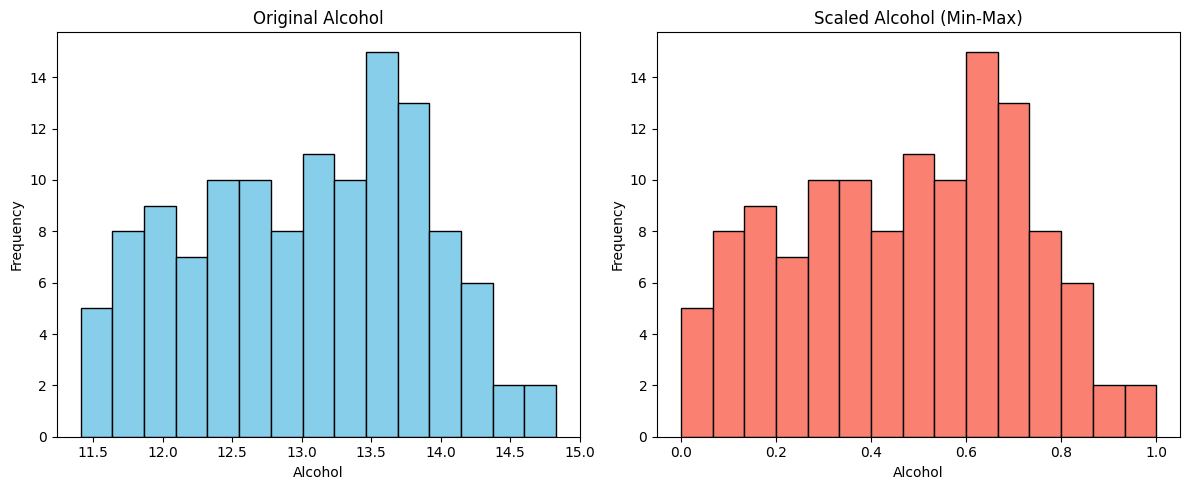

In [49]:
#Excersize 4.1
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler


X_train_df = pd.DataFrame(X_train, columns=df_wine.columns[1:])  # Convert to DataFrame for easy plotting

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_train_norm_df = pd.DataFrame(X_train_norm, columns=df_wine.columns[1:])

plt.figure(figsize=(12,5))

# Original feature
plt.subplot(1, 2, 1)
plt.hist(X_train_df['Alcohol'], bins=15, color='skyblue', edgecolor='black')
plt.title('Original Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

# Scaled feature
plt.subplot(1, 2, 2)
plt.hist(X_train_norm_df['Alcohol'], bins=15, color='salmon', edgecolor='black')
plt.title('Scaled Alcohol (Min-Max)')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()




In [51]:
#Excersize 4.2
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)
print(X_train_std[:2])


print("Means of standardized features (train):", np.mean(X_train_std, axis=0))
print("Std dev of standardized features (train):", np.std(X_train_std, axis=0))


[[ 0.71225893  2.22048673 -0.13025864  0.05962872 -0.50432733 -0.52831584
  -1.24000033  0.84118003 -1.05215112 -0.29218864 -0.20017028 -0.82164144
  -0.62946362]
 [ 0.88229214 -0.70457155  1.17533605 -0.09065504  2.34147876  1.01675879
   0.66299475  1.0887425  -0.49293533  0.13152077  1.33982592  0.54931269
   1.47568796]]
Means of standardized features (train): [ 6.89009781e-15  1.68324136e-16  3.79965996e-15  2.85613826e-16
 -3.17846108e-16  1.66264851e-15  1.59818395e-16 -1.19886180e-15
  1.88827448e-15 -1.61519543e-15 -5.78390382e-16  8.63108868e-16
 -1.33405831e-16]
Std dev of standardized features (train): [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


Task 
When is standardization preferred over normalization?
    - when features have outliers
    

In [52]:
#Section 5
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=1.0, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 1.0
Test accuracy: 1.0
[[ 1.24624552  0.18058957  0.74635591 -1.1640707   0.          0.
   1.16061094  0.          0.          0.          0.          0.55766856
   2.50876173]
 [-1.53712821 -0.38756723 -0.99517832  0.36517434 -0.05961749  0.
   0.66822704  0.          0.         -1.93484481  1.23313015  0.
  -2.2315349 ]
 [ 0.13509012  0.16920529  0.35754335  0.          0.          0.
  -2.43381207  0.          0.          1.56318806 -0.8190042  -0.49510418
   0.        ]]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


In [53]:
#Excersize 5.1

lr = LogisticRegression(penalty='l1', C= 0.1, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

Training accuracy: 0.9596774193548387
Test accuracy: 0.9814814814814815
[[ 0.2191179   0.          0.          0.          0.          0.
   0.54231639  0.          0.          0.          0.          0.
   1.51561468]
 [-0.76615164 -0.04052179  0.          0.          0.          0.
   0.          0.          0.         -0.82386715  0.0072086   0.06461044
  -0.41587771]
 [ 0.          0.          0.          0.          0.          0.
  -0.74319187  0.          0.          0.42955064 -0.3194862  -0.51970915
   0.        ]]


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1296: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its defaul

Training accuracy: 1.0
Test accuracy: 1.0
[[ 2.80131227  1.01982115  2.05464046 -3.14705403  0.34872918  0.
   1.7754341   0.          0.          0.          0.          2.16435626
   3.91658778]
 [-2.69377566 -1.10143552 -2.84404302  1.43918179  0.          0.
   1.88696525  0.97347783  0.         -6.08626002  2.37408027  0.
  -5.36261981]
 [ 2.01552141  0.01222983  1.33661552  0.          0.          0.
  -5.10030014 -0.58228534  0.          3.07375035 -2.05473132 -1.33426909
   0.        ]]


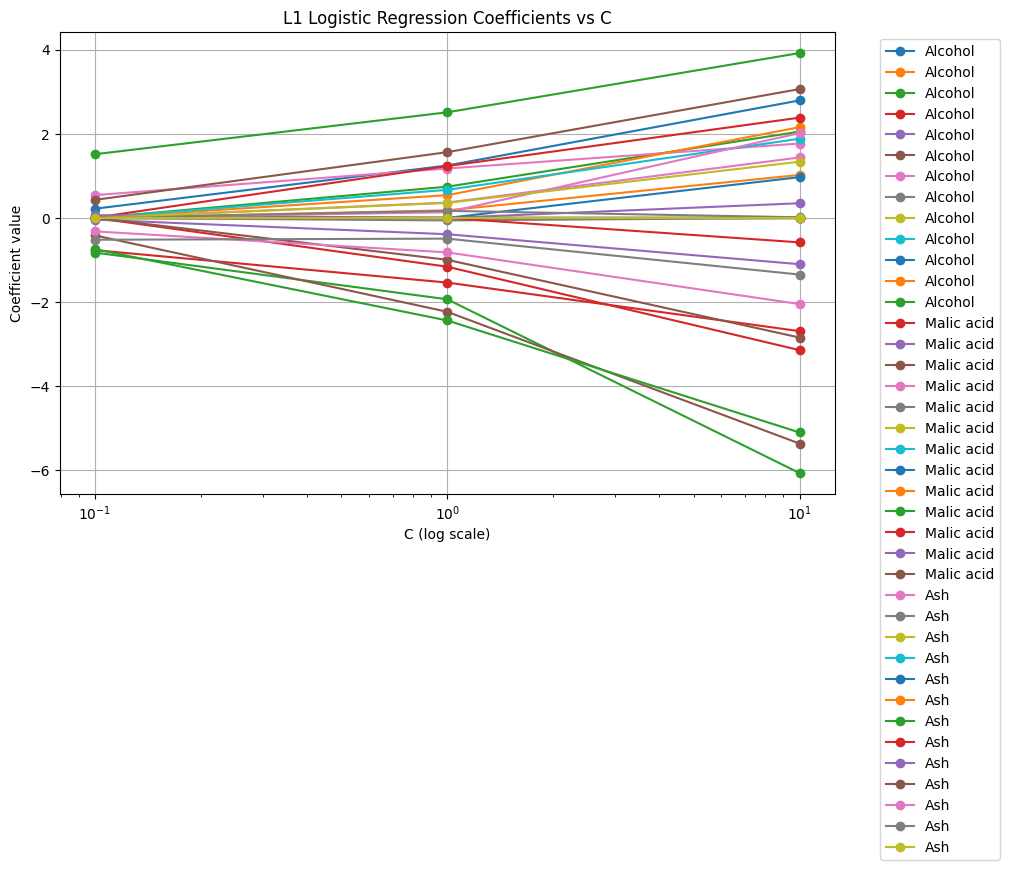

In [55]:

lr = LogisticRegression(penalty='l1', C=10, solver='liblinear', multi_class='ovr')
lr.fit(X_train_std, y_train)
print('Training accuracy:', lr.score(X_train_std, y_train))
print('Test accuracy:', lr.score(X_test_std, y_test))
print(lr.coef_)

coefs = []
C_values = [0.1, 1, 10]
for C in C_values:
    lr = LogisticRegression(penalty='l1', C=C, solver='liblinear', multi_class='ovr')
    lr.fit(X_train_std, y_train)
    coefs.append(lr.coef_)

coefs = np.array(coefs)

plt.figure(figsize=(10,6))
for i in range(coefs.shape[1]):
    plt.plot(C_values, coefs[:, i], marker='o', label=df_wine.columns[i+1])  # +1 because first col is class

plt.xscale('log')
plt.xlabel('C (log scale)')
plt.ylabel('Coefficient value')
plt.title('L1 Logistic Regression Coefficients vs C')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


Task
Vary C (e.g., 0.1, 10). Observe sparsity in coefficients.
Small (e.g., 0.1)	Strong regularization -  more coefficients shrink to zero → more sparsity
Large (e.g., 10)	Weak regularization - coefficients less shrunk → less sparsity

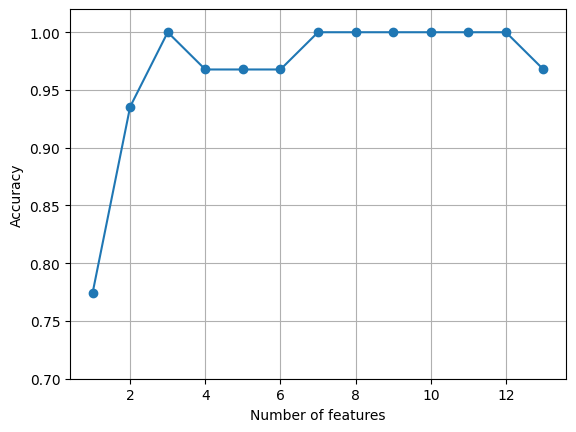

Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')
Test accuracy: 0.9259259259259259


In [67]:
#Excersize 5.2
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


class SBS():
    def __init__(self, estimator, k_features, scoring=accuracy_score,
                 test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state

    def fit(self, X, y):

        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                             random_state=self.random_state)

        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]

        while dim > self.k_features:
            scores = []
            subsets = []

            for p in combinations(self.indices_, r=dim - 1):
                score = self._calc_score(X_train, y_train,
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)

            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1

            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]

        return self

    def transform(self, X):
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score
# Paste SBS class here

from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors= 5)
sbs = SBS(knn, k_features= 1)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])

# Performance with selected
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

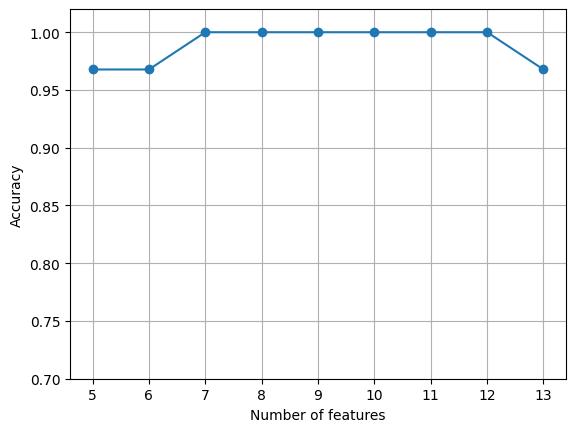

Index(['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Total phenols',
       'Nonflavanoid phenols', 'Color intensity',
       'OD280/OD315 of diluted wines'],
      dtype='object')
Test accuracy: 0.9814814814814815


In [68]:
knn = KNeighborsClassifier(n_neighbors= 5)
sbs = SBS(knn, k_features= 5)
sbs.fit(X_train_std, y_train)

k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()

# Selected features
k3 = list(sbs.subsets_[5])
print(df_wine.columns[1:][k3])

# Performance with selected
knn.fit(X_train_std[:, k3], y_train)
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))

Task

If k_features = 5, SBS stops when 5 features remain—it does not remove any more, even if there are fewer features left
when K_features is five the test accuracy is more than when k_features is 1

 1) Proline                        0.185453
 2) Flavanoids                     0.174751
 3) Color intensity                0.143920
 4) OD280/OD315 of diluted wines   0.136162
 5) Alcohol                        0.118529
 6) Hue                            0.058739
 7) Total phenols                  0.050872
 8) Magnesium                      0.031357
 9) Malic acid                     0.025648
10) Proanthocyanins                0.025570
11) Alcalinity of ash              0.022366
12) Nonflavanoid phenols           0.013354
13) Ash                            0.013279


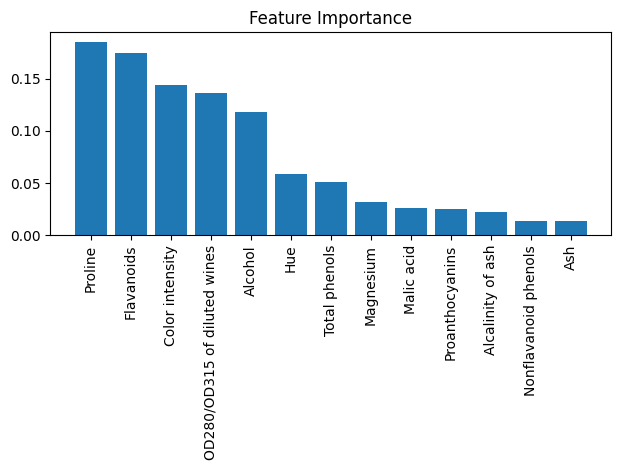

Original feature shape: (124, 13)
Selected feature shape: (124, 5)


In [70]:
#Excersize 5.3

from sklearn.ensemble import RandomForestClassifier

feat_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, threshold=0.1, prefit=True)
X_train_sfm = sfm.transform(X_train)
X_test_sfm = sfm.transform(X_test)

print("Original feature shape:", X_train.shape)
print("Selected feature shape:", X_train_sfm.shape)


In [71]:
forest_sfm = RandomForestClassifier(n_estimators=500, random_state=1)
forest_sfm.fit(X_train_sfm, y_train)

# Evaluate
print("Test accuracy with selected features:", forest_sfm.score(X_test_sfm, y_test))


Test accuracy with selected features: 1.0


Compare top features: Random Forest vs SBS

Random Forest top features:

Features with importance ≥ 0.1.

SBS top features:

Features selected at the final k_features subset in SBS.

Compare:

Are the same features consistently chosen?

Differences may occur because:

RF measures importance globally via ensemble votes

SBS measures impact of removal on specific classifier (e.g., KNN)

Conclusion

Handling Missing Data:

Missing values can bias or break models.

Techniques: dropna(), fillna() with mean, median, or mode.

Choosing the right method depends on dataset size, amount of missing data, and importance of features.

Categorical Data:

Label encoding: Converts categories into integers (e.g., 'red' → 0, 'green' → 1). Good for ordinal data.

One-hot encoding: Converts categories into binary columns. Useful for nominal data where there’s no inherent order.

Feature Scaling:

Normalization (Min-Max): Rescales values to a fixed range [0,1]. Sensitive to outliers.

Standardization (Z-score): Rescales features to mean=0, std=1. Less sensitive to outliers.

Impact on algorithms:

Distance-based algorithms like KNN, K-Means, or SVM are sensitive to feature scales.

Standardized features prevent dominance of large-scale features over small-scale ones.

Feature Selection:

L1 Regularization (Lasso): Shrinks coefficients, some go to 0 (sparse). Simple, interpretable, works directly in training.

Sequential Backward Selection (SBS): Iteratively removes features, measures effect on classifier performance. Flexible, model-dependent, can be computationally expensive.

Random Forest Feature Importance / SelectFromModel: Measures global feature importance and selects top features automatically.